In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, njit
from numba.types import pyobject
import numba
import time
import jit_functions as jf

In [2]:
log_gammas = np.logspace(-3,3, 5)
gammas = np.array([float(10**(2*p)) for p in range(-3,3)])
big_logs = np.logspace(-3,1.699, 50)

# Creating my OBABO class element

# Mapping the unimodal

In [3]:
# defining functions for potential and force
@njit()
def U(x):
    return x**2/2

@njit()
def force(q):
    F = q
    return -F

obabo_step = jf.make_obabo(force)
OBABO = jf.Scheme(obabo_step, force, U)

# Graphing the results of the simulation

Time Elapsed: 52.78049850463867


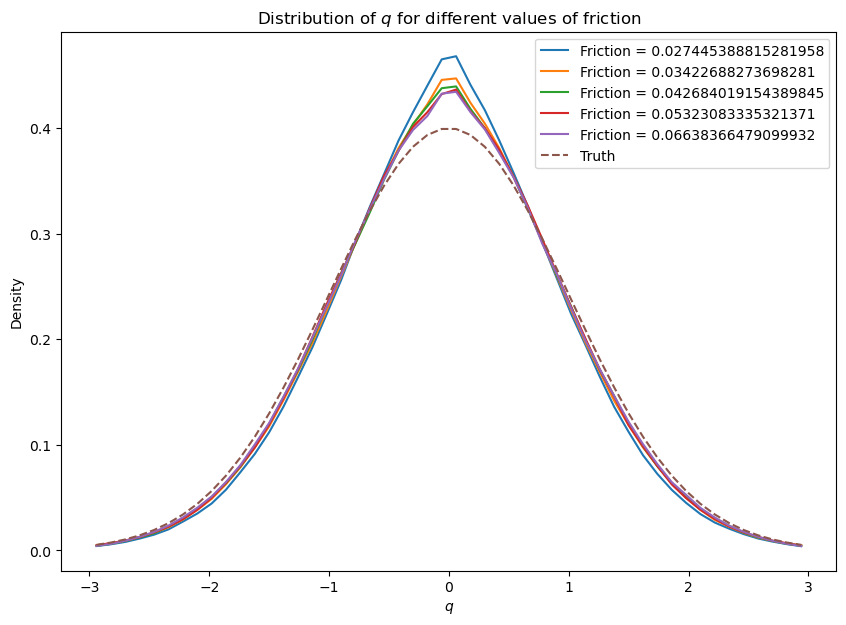

In [21]:
# running 1000 simulations, each taking 100000 steps of size 0.01
start_time =time.time()
OBABO.friction_graph(30000, 0.01, 1000, big_logs[15:20])
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

Gamma = 0.001
Iters = 110000
Gamma = 0.0012470904663564033
Iters = 110000
Gamma = 0.0015552346312770332
Iters = 110000
Gamma = 0.0019395182816129045
Iters = 110000
Gamma = 0.0024187547583234097
Iters = 110000
Gamma = 0.0030164059995593105
Iters = 110000
Gamma = 0.003761731164710674
Iters = 110000
Gamma = 0.004691219072506456
Iters = 110000
Gamma = 0.0058503745809121354
Iters = 110000
Gamma = 0.007295946364469363
Iters = 110000
Gamma = 0.009098705154177404
Iters = 110000
Gamma = 0.011346908453962521
Iters = 110000
Gamma = 0.014150621355555537
Iters = 110000
Gamma = 0.017647104985532645
Iters = 110000
Gamma = 0.022007536386248326
Iters = 110000
Gamma = 0.027445388815281958
Iters = 110000
Gamma = 0.03422688273698281
Iters = 110000
Gamma = 0.042684019154389845
Iters = 110000
Gamma = 0.05323083335321371
Iters = 110000
Gamma = 0.06638366479099932
Iters = 110000
Gamma = 0.08278643548265453
Iters = 110000
Gamma = 0.10324217443404794
Iters = 103385
Gamma = 0.12875233146260612
Iters = 110000
Gam

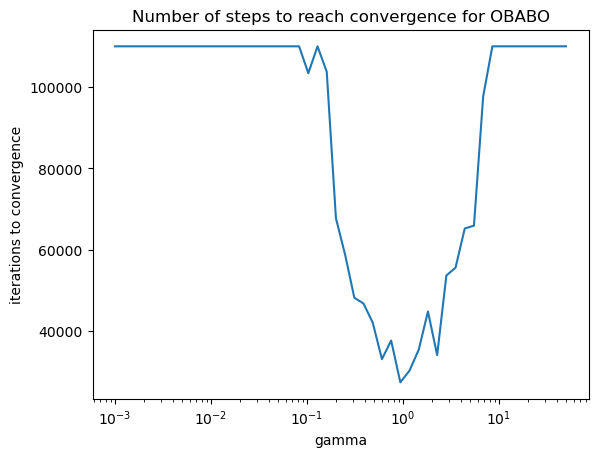

In [4]:
start_time =time.time()
OBABO.avg_convergence_time_graph("Number of steps to reach convergence for OBABO",0.1, jf.square, 1, 0.01, big_logs,q_init = np.zeros(100), p_init =np.zeros(100))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

Time Elapsed: 4.439497947692871


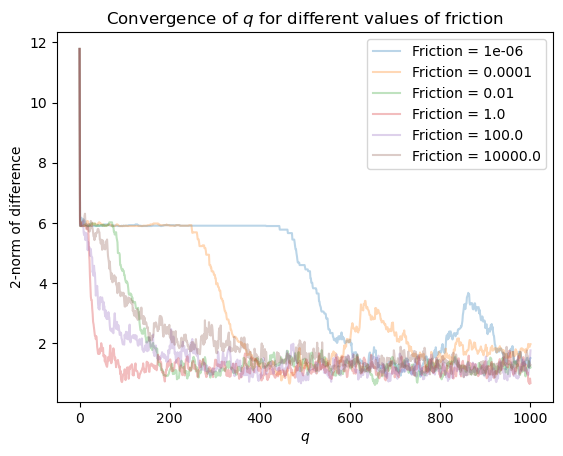

In [5]:
start_time =time.time()
OBABO.convergence_graph(1000, 0.01, 100, gammas)
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

In [ ]:
start_time =time.time()
OBABO.expectation_graph(U,10000, 0.01, 100, gammas, q_init = np.random.normal(size =100), p_init = np.random.normal(size = 100))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

In [ ]:
start_time =time.time()
OBABO.convergence_time_graph(1/3, jf.nothing, 0, 0.01, log_gammas,q_init = np.random.normal(size =100), p_init =np.random.normal(size = 100))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

Gamma = 0.001
Gamma = 0.03162277660168379


In [ ]:
start_time =time.time()
OBABO.convergence_graph(1/10, jf.nothing, 0, 0.01, log_gammas)
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

In [ ]:
#OBABO.convergence_time_graph(1/10, square, 1.041797296487154, 0.01, lingammas,q_init = np.random.normal(size =1000), p_init =np.random.normal(size = 1000))

In [ ]:
start_time =time.time()
OBABO.expectation_graph(jf.square,10000, 0.01, 1, gammas, q_init = np.random.normal(size =100), p_init =np.random.normal(size = 100))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

In [ ]:
start_time =time.time()
OBABO.expectation_graph(jf.nothing,10000, 0.01, 100, gammas, q_init = np.random.normal(size =100), p_init = np.random.normal(size = 100))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

# A new potential
$U(x) = \log{( e^{2(x-1)^2} + e^{2(x+1)^2} + e^{-(x-3)^2} + e^{(x+3)^2})}$

In [3]:
# defining the method
@jit(nopython=True)
def potential(x):
    return -np.log( np.exp(-2*(x-1)**2) + np.exp(-2*(x+1)**2) + np.exp(-2*(x+3)**2) + np.exp(-2*(x-3)**2) )

@jit(nopython=True)
def force_2(x):
    r = -4*(x-1)*np.exp(-2*(x-1)**2)  -4*(x+1)*np.exp(-2*(x+1)**2)  -4*(x+3)*np.exp(-2*(x+3)**2) -4*(x-3)*np.exp(-2*(x-3)**2)
    F = r/(np.exp(-2*(x-1)**2) + np.exp(-2*(x+1)**2) + np.exp(-2*(x+3)**2) + np.exp(-2*(x-3)**2))
    return F

obabo_step_2 = jf.make_obabo(force_2)
OBABO_2 = jf.Scheme(obabo_step_2, force_2, potential)

In [ ]:
start_time =time.time()
OBABO_2.friction_graph(10000, 0.01, 1000, gammas)
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

In [ ]:
start_time =time.time()
OBABO_2.expectation_graph(potential,10000, 0.01, 1000, gammas, q_init =np.random.normal(size = 100), p_init = np.random.normal(size = 100))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

In [ ]:
print(f"Time Elapsed: {end_time - start_time}")
start_time = time.time()
OBABO_2.expectation_graph(jf.square, 1000, 0.01, 1000, gammas)
end_time = time.time()
print(f"Time Elapsed: {end_time - start_time}")

Gamma = 0.001
Gamma = 0.03162277660168379
Gamma = 1.0
Gamma = 31.622776601683793
Gamma = 1000.0
Time Elapsed: 184.0559904575348


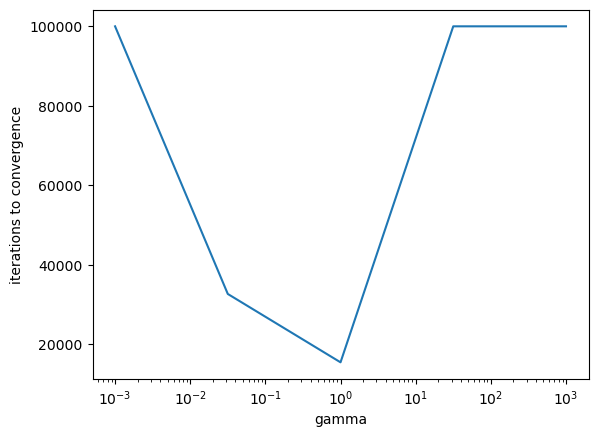

In [9]:
start_time =time.time()
OBABO.convergence_time_graph(1/3, jf.nothing, 0, 0.01, log_gammas,q_init = np.ones(100), p_init =np.random.normal(size = 100))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

# Assymmetrical Potentials

In [11]:
@jit(nopython=True)
def potential_3(x):
    return (x-0.9)**4/8 - (x-1)**2/1.2

@jit(nopython=True)
def force_3(x):
    F = -(x-0.9)**3/4 + (x-1)*2/1.2
    return F

In [12]:
obabo_step_3 = jf.make_obabo(force_3)

In [13]:
OBABO_3 = jf.Scheme(obabo_step_3, force_3, potential_3)

Time Elapsed: 23.996824264526367


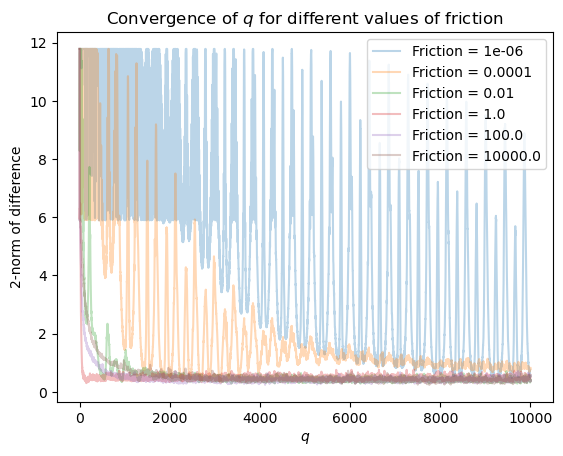

In [17]:
start_time =time.time()
OBABO_3.convergence_graph(10000, 0.01, 1000, gammas)
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

In [3]:
0start_time =time.time()
OBABO_3.friction_graph(10000, 0.01, 1000, gammas)
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

SyntaxError: invalid decimal literal (2174364446.py, line 1)

In [3]:
start_time =time.time()
OBABO_3.convergence_time_graph(1/5, jf.nothing, 0, 0.01, log_gammas,q_init = np.random.normal(size =100), p_init =np.random.normal(size = 100))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

NameError: name 'OBABO_3' is not defined

# 4 mode asymmetrical

In [8]:
@jit(nopython=True)
def potential_4(x):
    return -np.log( np.exp(-2*(x-1)**2) + 2*np.exp(-3*(x+1.1)**2) + 1.5*np.exp(-2*(x+3)**2) + np.exp(-2*(x-3)**2) )

@jit(nopython=True)
def force_4(x):
    r = -4*(x-1)*np.exp(-2*(x-1)**2)  -2*4*(x+1)*np.exp(-3*(x+1)**2)  -1.5*4*(x+3)*np.exp(-2*(x+3)**2) -4*(x-3)*np.exp(-2*(x-3)**2)
    F = r/(np.exp(-2*(x-1)**2) + 2*np.exp(-3*(x+1.1)**2) + 1.5*np.exp(-2*(x+3)**2) + np.exp(-2*(x-3)**2))
    return F

obabo_step_4 = jf.make_obabo(force_4)
OBABO_4 = jf.Scheme(obabo_step_4, force_4, potential_4)

In [4]:
start_time =time.time()
OBABO_4.friction_graph(20000, 0.01, 100, gammas,q_init = np.random.normal(size =1000), p_init =np.random.normal(size = 1000) )
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")


KeyboardInterrupt



In [ ]:
start_time =time.time()
OBABO_4.friction_graph(100000, 0.01, 100, big_logs,q_init = np.random.normal(size =1000), p_init =np.random.normal(size = 1000) )
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

Time Elapsed: 76.92914533615112


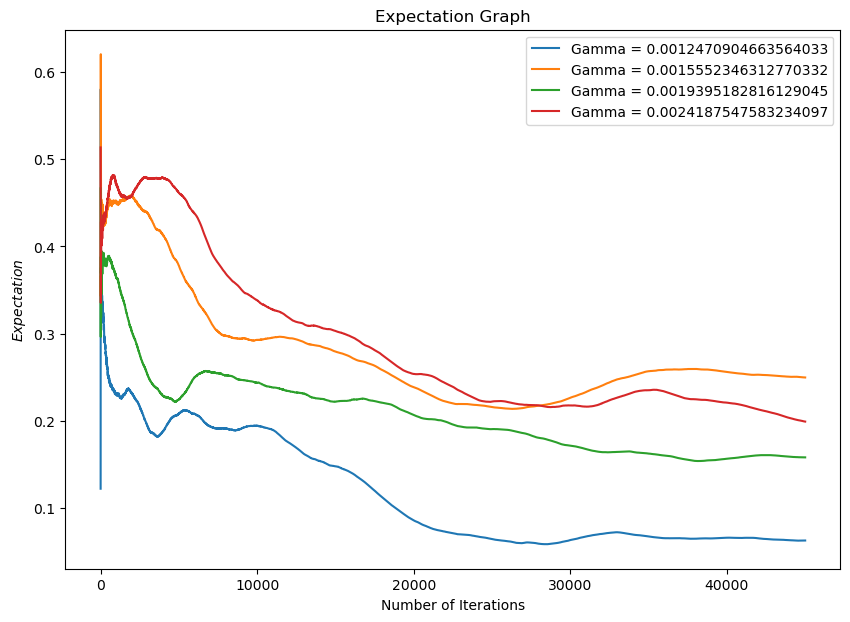

In [7]:
start_time =time.time()
OBABO_4.expectation_graph(potential_4,50000, 0.1,1000, big_logs[1:5],q_init = np.random.normal(size =10), p_init =np.random.normal(size = 10))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

In [10]:
big_logs = np.logspace(-3,1.699, 50)[26:40]

In [11]:
true_x_val = -0.47298443947

In [12]:
potential_val = -1.58376/7.731

In [13]:
true_val = 46.48/7.731
print(true_val)

6.0121588410296205


In [ ]:
start_time =time.time()
OBABO_4.avg_convergence_time_graph("Number of steps to reach convergence for OBABO",1/3, jf.square, true_val, 0.01, big_logs,q_init = np.random.normal(size =100), p_init =np.random.normal(size = 100))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

Gamma = 0.3114203143704111
Iters = 502676
Gamma = 0.3883693050810541


In [ ]:

start_time =time.time()
OBABO_4.avg_convergence_time_graph("Number of steps to reach convergence for OBABO",0.1, potential_4, potential_val, 0.01, big_logs,q_init = np.zeros(100), p_init =np.zeros(100))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

Gamma = 0.001
Iters = 1000000
Gamma = 0.0012470904663564033


In [4]:
# defining functions for potential and force
@njit(parallel=True)
def U(x):
    return - x**2/2 + x**4/4

@njit(parallel=True)
def force(q):
    F = q - q**3
    return F

baoab_step = jf.make_baoab(force)
BAOAB = jf.Scheme(baoab_step, force, U)